* This is Part 3 of 4 Code files for Week 2 Titanic Modelling assignment
### Random Forrest model for Titanic Dataset using feature engineered dataset

In [58]:
import pandas as pd
import os
import numpy as np

In [69]:
#Import the cleaned datframe df from the first Project Jupyter file
##Select columns for final model dataset for the Random Forest model

###Note ## Note## "Achtung"###### 
####Note, you might need to run the last cell  at the end of 'Wk2_Proj_acraig.ipynb notebook file before 
##running this cell

%store -r df
df = df
df_mod_rf = df
df_mod_rf.columns



Index(['index', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C1', 'Age_i',
       'Age_Cat', 'Child', 'Elderly', 'Middle_Aged', 'Teenager',
       'Young_Adults', 'Age_Cat_i', 'Title', 'Master', 'Miss', 'Mr', 'Mrs',
       'RareTitle', 'Title_Cat', 'Fare_Cat', 'Fare_Cat_i', 'Fare_btw_10_25',
       'Fare_lt10', 'Fare_mt100', 'Fare_mt25_50', 'Fare_mt50_100', 'Deck',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'U'],
      dtype='object')

In [70]:
#Select only relevant columns for the Random Forrest Model:
df_mod_rf.drop(['PassengerId', 'Name','Age', 'Age_Cat', 'Ticket', 'Fare', 'Cabin', 'C1', 'Age_i','Title', 'Fare_Cat','Child', 'Elderly', 'Middle_Aged', 'Teenager','Young_Adults', 'Title', 'Master', 'Miss', 'Mr', 'Mrs', 'RareTitle','Fare_Cat','Fare_btw_10_25', 'Fare_lt10','Fare_mt100', 'Fare_mt25_50', 'Fare_mt50_100', 'Deck_A','Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'U' ], axis=1, inplace=True)


In [84]:
df_mod_rf.columns
df_mod_rf['Deck'] =df_mod_rf['Deck'].astype(int)

  
# displaying the datatypes
display(df.dtypes)

index         int64
Survived      int64
Pclass        int64
Sex           int64
SibSp         int64
Parch         int64
Embarked      int64
Age_Cat_i     int64
Title_Cat     int32
Fare_Cat_i    int32
Deck          int32
dtype: object

In [ ]:
###Implement a Random Forrest Model usin SKlearn

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X = df_mod_rf[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title_Cat',
       'Fare_Cat_i', 'Deck', 'Age_Cat_i']]
y = df_mod_rf["Survived"]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y, test_size = 0.02, random_state =2129)
X_train_rf.shape, y_train_rf.shape,
X_test_rf.shape, y_test_rf.shape

((15, 9), (15,))

In [110]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier


rf_mod = RandomForestClassifier(n_estimators=15, max_depth=7, class_weight='balanced', bootstrap=True,  criterion='entropy',)
rf_mod.fit(X_train_rf,y_train_rf)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, n_estimators=15)

In [111]:
df_mod_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   index       713 non-null    int64
 1   Survived    713 non-null    int64
 2   Pclass      713 non-null    int64
 3   Sex         713 non-null    int64
 4   SibSp       713 non-null    int64
 5   Parch       713 non-null    int64
 6   Embarked    713 non-null    int64
 7   Age_Cat_i   713 non-null    int64
 8   Title_Cat   713 non-null    int32
 9   Fare_Cat_i  713 non-null    int32
 10  Deck        713 non-null    int32
dtypes: int32(3), int64(8)
memory usage: 53.0 KB


In [112]:
#Accuracy of Random Forrest model: Train and Test
ypred = rf_mod.predict(X_test_rf)
round( rf_mod.score(X_train_rf, y_train_rf) ,2) , round(rf_mod.score(X_test_rf, y_test_rf)  ,2)

(0.87, 0.8)

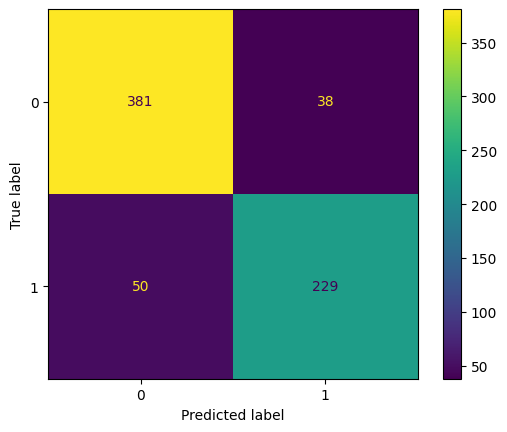

In [113]:
#Confusion Matri
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test_rf, ypred),
    columns=['Predicted Survived', 'Predicted Died'],
    index=['True Survived', 'True Died']
)

plot_confusion_matrix(rf_mod, X_train_rf, y_train_rf, normalize=None)

In [114]:
#Cross Validation of Random Forrest Model:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_mod, X_train_rf, y_train_rf, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.87142857 0.84285714 0.84285714 0.78571429 0.82857143 0.82857143
 0.82857143 0.78571429 0.76811594 0.75362319]
Mean: 0.8136024844720497
Standard Deviation: 0.035985801407560976


In [ ]:
#Variable Importance to Probabiity of Survival or Death

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

importances = pd.DataFrame({'feature':X_train_rf.columns,'importance':np.round(rf_mod.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title_Cat,0.207
Sex,0.188
Pclass,0.122
Fare_Cat_i,0.107
Age_Cat_i,0.105
Deck,0.101
SibSp,0.081
Parch,0.051
Embarked,0.039


<AxesSubplot:xlabel='feature'>

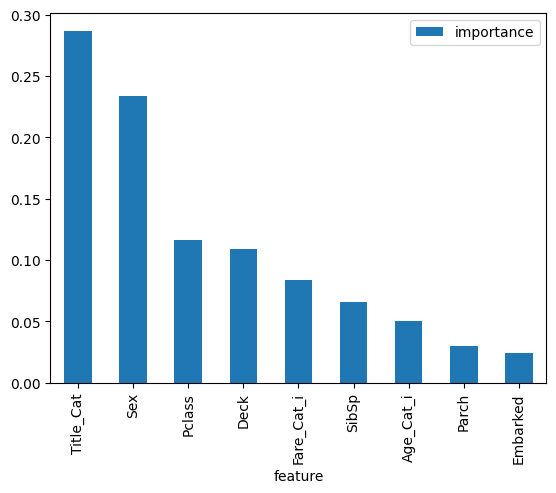

In [93]:
importances.plot.bar()

In [1]:
%store  df_mod_rf
%store rf_mod
rf_mod

UsageError: Unknown variable 'df_mod_rf'
